In [17]:
from rdkit import Chem
from rdkit.Chem import rdBase,Draw,AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D, IPythonConsole
import networkx as nx
from networkx.readwrite import cytoscape_data
from rdkit.Chem.Scaffolds import rdScaffoldNetwork
from urllib import parse
import matplotlib.pyplot as plt
%matplotlib ipympl

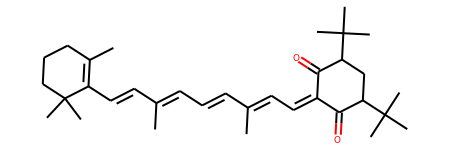

In [22]:
smile='C1=CC(=CC=C1NC2=C(C=C3C(=C2)C(=O)NC3=O)NC4=CC=C(C=C4)F)F'
smile='C/C(=C\C=C1C(=O)C(CC(C1=O)C(C)(C)C)C(C)(C)C)/C=C/C=C(/C=C/C1=C(C)CCCC1(C)C)\C'
mol=Chem.MolFromSmiles(smile)
mol

In [ ]:
mols = []
smiles = ['C1=CC(=CC=C1NC2=C(C=C3C(=C2)C(=O)NC3=O)NC4=CC=C(C=C4)F)F', 'C/C(=C\C=C1C(=O)C(CC(C1=O)C(C)(C)C)C(C)(C)C)/C=C/C=C(/C=C/C1=C(C)CCCC1(C)C)\C']
for smi in smiles:
    mols.append(Chem.MolFromSmiles(smi))

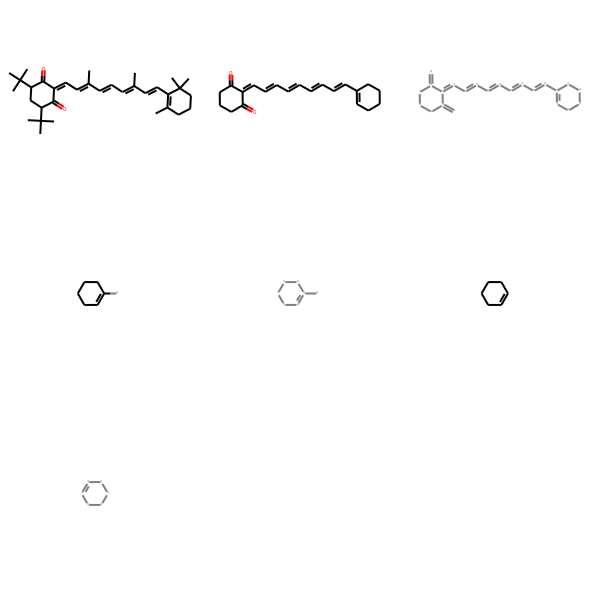

In [23]:
SNpara = rdScaffoldNetwork.ScaffoldNetworkParams()
SN = rdScaffoldNetwork.CreateScaffoldNetwork([mol], SNpara)
mol_nodes = [Chem.MolFromSmiles(sma) for sma in SN.nodes]
Draw.MolsToGridImage(mol_nodes)

In [27]:
g = nx.Graph()
for idx, node in enumerate(SN.nodes):
    g.add_node(idx)
    g.add_edges_from([(e.beginIdx,e.endIdx) for e in SN.edges])
    
plt.figure(figsize=(3, 3), dpi=300)
pos = nx.spring_layout(g, k=100)
gas = nx.spring_layout(g,scale=100)
nx.draw_networkx(g,gas,font_size=8,node_size=100)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Visualization Improvement

In [25]:
def smi2svg(smi):
    mol = Chem.MolFromSmiles(smi)
    try:
        Chem.rdmolops.Kekulize(mol)
    except:
        pass
    drawer = rdMolDraw2D.MolDraw2DSVG(690, 400)
    AllChem.Compute2DCoords(mol)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace("svg:", "")
    return svg
  
def smi2image(smi):
    svg_string = smi2svg(smi)
    impath = 'data:image/svg+xml;charset=utf-8,' + parse.quote(svg_string, safe="")
    return impath

In [30]:
import ipycytoscape

g = nx.Graph()
for idx, node in enumerate(SN.nodes):
    g.add_node(idx, smiles=node, img=smi2image(node), hac=Chem.MolFromSmiles(node).GetNumAtoms())
    g.add_edges_from([(e.beginIdx,e.endIdx) for e in SN.edges])

cyobj = ipycytoscape.CytoscapeWidget()
cyobj.graph.add_graph_from_networkx(g)
cyobj.set_style([
    {
        'css': {
            'background-image':'data(img)',
            'background-fit':'contain'
        },
        'selector': 'node'
    },
    {
        'selector': ':selected',
        'css': {
            'content': 'data(eqlist)',
            'background-color': 'black',
            'line-color': 'black',
            'target-arrow-color': 'black',
            'source-arrow-color': 'black',
            'text-outline-color': 'black'
        }
    }
])
cyobj

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'css': {'background-image': 'data(img)', …